# Seminar 7

### distributia normala si student $t$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

In [6]:
x=0

In [7]:
norm.cdf(x)

0.5

valoarea functiei de repartitie pt x

In [8]:
alfa = 0.05
norm.ppf(alfa) 

-1.6448536269514729

In [9]:
norm.ppf(1-alfa)

1.6448536269514722

In [10]:
-norm.ppf(alfa)

1.6448536269514729

> distributia $t$

In [11]:
from scipy.stats import t

In [16]:
x=1
t.cdf(x,df=5), t.cdf(x,df=10), t.cdf(x,df=100), t.cdf(x,df=5000), norm.cdf(x)

(0.8183912661754387,
 0.82955343384897,
 0.8401379221079381,
 0.841320550205985,
 0.8413447460685429)

In [17]:
x=0.05
t.ppf(x,df=5), t.ppf(x,df=10), t.ppf(x,df=100), t.ppf(x,df=5000), norm.ppf(x)

(-2.0150483726691575,
 -1.8124611228107341,
 -1.6602343260657506,
 -1.6451584375969714,
 -1.6448536269514729)

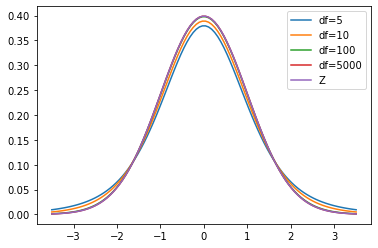

In [20]:
x=np.linspace(-3.5,3.5, 100)

plt.plot(x, t.pdf(x, df=5), label="df=5")
plt.plot(x, t.pdf(x, df=10), label="df=10")
plt.plot(x, t.pdf(x, df=100), label="df=100")
plt.plot(x, t.pdf(x, df=5000), label="df=5000")
plt.plot(x, norm.pdf(x), label="Z")
plt.legend()

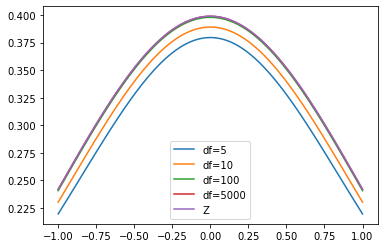

In [21]:
x=np.linspace(-1,1, 100)

plt.plot(x, t.pdf(x, df=5), label="df=5")
plt.plot(x, t.pdf(x, df=10), label="df=10")
plt.plot(x, t.pdf(x, df=100), label="df=100")
plt.plot(x, t.pdf(x, df=5000), label="df=5000")
plt.plot(x, norm.pdf(x), label="Z")
plt.legend()

# Intervale de încredere

Un eșantion de 50 de elemente dintr-o populație cu σ=6 are media 32. Construiți intervalele de încredere ale mediei de 90%, 95%, și 99%.

In [41]:
n=50
sigma=6
x_barat=32
alfa=0.1

In [42]:
# z, sigma
eroarea_standard=sigma/np.sqrt(n)
z_alfa_pe_2= norm.ppf(1-alfa/2)

In [43]:
z_alfa_pe_2

1.6448536269514722

In [44]:
Jos = x_barat - z_alfa_pe_2 * eroarea_standard
Sus = x_barat + z_alfa_pe_2 * eroarea_standard

In [45]:
Jos, Sus

(30.60429541558799, 33.39570458441201)

In [46]:
Alfa=[0.1,0.05,0.01]
for alfa in Alfa:
    z_alfa_pe_2= norm.ppf(1-alfa/2)
    Jos = x_barat - z_alfa_pe_2 * eroarea_standard
    Sus = x_barat + z_alfa_pe_2 * eroarea_standard
    print(f'alpha={alfa}, [{Jos},{Sus}]')

alpha=0.1, [30.60429541558799,33.39570458441201]
alpha=0.05, [30.336915410780385,33.663084589219615]
alpha=0.01, [29.81433635873786,34.18566364126214]


Un interval de încredere de 95% pentru medie este calculat între 152 și 160. Dacă σ=15 iar populația e normal distribuită, care este mărimea eșantionului folosit în acest studiu?

In [47]:
# z, sigma

In [55]:
alfa=0.05
jos=152
sus=160
sigma=15
# n=?

In [56]:
x_barat=(jos+sus)/2
x_barat

156.0

In [57]:
z_alfa_pe_2 = norm.ppf(1-alfa/2)

In [58]:
n=((sigma * z_alfa_pe_2) / (sus - x_barat))**2
n

54.02051466601114

## Tema

Pentru a estima valoarea medie a sumelor cheltuite de clienți la un restaurant se folosește un eșantion de 55 de elemente cu media 120. Presupunând că abaterea medie pătratică a populației este de 30, să se calculeze intervalul de încredere pentru medie de 95%.

## Seminar

Următoarele valori provin dintr-o distribuție normală: 10,8,12,15,13,11,6,5.
1.	Calculați media și abaterea medie pătratică a eșantionului;
2. 	Calculați intervalul de încredere pentru medie (99%).

In [59]:
x=np.array([10,8,12,15,13,11,6,5])
x

array([10,  8, 12, 15, 13, 11,  6,  5])

In [61]:
x_barat=np.mean(x)
x_barat

10.0

In [64]:
alfa = 0.01
n = len(x)
t_alfa_pe_2 = t.ppf(1-alfa/2, df = n-1)

In [66]:
s=np.std(x, ddof=1)
s

3.4641016151377544

In [68]:
jos= x_barat - t_alfa_pe_2 * s / np.sqrt(n)
sus= x_barat + t_alfa_pe_2 * s / np.sqrt(n)
jos, sus

(5.714025779049446, 14.285974220950553)

# Tema + mai jos

Un eșantion aleator de 54 de elemente are media 22.5 și s=4.4. Calculați intervalele de încredere ale mediei de 90%, 95% și 99%. 

Simulați intervalele de încredere pentru medie de 90%, 95%, 99% folosind eșantioane de mărime n=20, 30, 50, 100, pornind de la:
-	o populație normal distribuită cu media 5 și σ=2;
-	o populație uniform distribuită în intervalul 12,20.

>Pași:
>1.	Generați un număr (mare) de eșantioane de mărime n provenind din populație;
>2.	Calculați intervalele de încredere pe baza datelor din eșantioane;
>3.	Verificați de câte ori media populației apare în intervalul calculat.
>4.	Pentru un eșantion (oarecare) reprezentați grafic distribuția de eșantionare a mediei, distribuția corespunzătoare mediei eșantionului si intervalul de încredere de 95% (pe același grafic)